In [4]:
import pandas as pd

# Load the dataset
df = pd.read_csv("kiswahili_hate_speech_dataset.csv")
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Clean and prepare the text data
def preprocess_text(text):
    # Here you can add more preprocessing steps as needed (e.g., lowercasing, removing special characters)
    return text.lower()

df['Text'] = df['Text'].apply(preprocess_text)

# Split the dataset into training and testing sets
X = df['Text']
y = df['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text data to TF-IDF features
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Convert labels to categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Build the model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train_tfidf.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))  # 2 classes (hate speech and non-hate speech)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_tfidf.toarray(), y_train_cat, epochs=10, batch_size=32, validation_data=(X_test_tfidf.toarray(), y_test_cat))

# Evaluate the model
loss, accuracy = model.evaluate(X_test_tfidf.toarray(), y_test_cat)
print(f'Accuracy: {accuracy}')



Epoch 1/10


C:\Users\STUDENT\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 866ms/step - accuracy: 0.5000 - loss: 0.7186

ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(None, 1), output.shape=(None, 2)

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.utils import to_categorical

# Load the dataset
df = pd.read_csv(r"C:\Users\STUDENT\kiswahili_hate_speech_dataset.csv")

# Preprocess the text
def preprocess_text(text):
    return text.lower()

df['Text'] = df['Text'].apply(preprocess_text)

# Split the dataset
X = df['Text']
y = df['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize text data
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Convert labels to categorical
y_train_cat = to_categorical(y_train, num_classes=2)
y_test_cat = to_categorical(y_test, num_classes=2)

# Build the model
model = Sequential()
model.add(Input(shape=(X_train_tfidf.shape[1],)))  # Input layer
model.add(Dense(128, activation='relu'))              # Hidden layer
model.add(Dropout(0.5))                               # Dropout layer
model.add(Dense(2, activation='softmax'))             # Output layer

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_tfidf.toarray(), y_train_cat, epochs=10, batch_size=32, validation_data=(X_test_tfidf.toarray(), y_test_cat))


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.0000e+00 - loss: 0.7620 - val_accuracy: 0.0000e+00 - val_loss: 0.7526
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.2500 - loss: 0.7489 - val_accuracy: 0.0000e+00 - val_loss: 0.7624
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.7500 - loss: 0.6742 - val_accuracy: 0.0000e+00 - val_loss: 0.7726
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5000 - loss: 0.7302 - val_accuracy: 0.0000e+00 - val_loss: 0.7838
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5000 - loss: 0.6500 - val_accuracy: 0.0000e+00 - val_loss: 0.7951
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5000 - loss: 0.6845 - val_accuracy: 0.0000e+00 - val_loss: 0.8067
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7500 - loss: 0.6777 - val_accuracy: 0.0000e+00 - val_loss: 0.8186
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 1.0000 - loss: 0.6172 - val_accura

Matplotlib is building the font cache; this may take a moment.


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5000 - loss: 0.7311 - val_accuracy: 0.0000e+00 - val_loss: 0.7657
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5000 - loss: 0.7284 - val_accuracy: 0.0000e+00 - val_loss: 0.7751
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5000 - loss: 0.6567 - val_accuracy: 0.0000e+00 - val_loss: 0.7854
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.7500 - loss: 0.6771 - val_accuracy: 0.0000e+00 - val_loss: 0.7963
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5000 - loss: 0.6831 - val_accuracy: 0.0000e+00 - val_loss: 0.8066
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5000 - loss: 0.6167 - val_accuracy: 0.0000e+00 - val_loss: 0.8174
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5000 - loss: 0.6804 - val_accuracy: 0.0000e+00 - val_loss: 0.8282
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5000 - loss: 0.6471 - val_accuracy: 

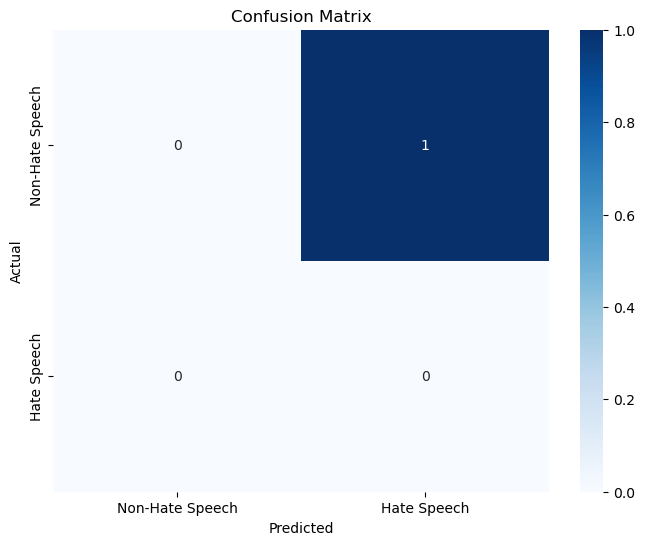


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Sample: "Watu wa kabila hili ni wapumbavu." | Predicted class: 1 (Hate Speech)
Sample: "Ninapenda watu wote." | Predicted class: 1 (Hate Speech)


C:\Users\STUDENT\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\STUDENT\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\STUDENT\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\STUDENT\anaconda3\Lib\site-packag

In [14]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv(r"C:\Users\STUDENT\kiswahili_hate_speech_dataset.csv")

# Preprocess the text
def preprocess_text(text):
    return text.lower()

df['Text'] = df['Text'].apply(preprocess_text)

# Split the dataset
X = df['Text']
y = df['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize text data
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Convert labels to categorical
y_train_cat = to_categorical(y_train, num_classes=2)
y_test_cat = to_categorical(y_test, num_classes=2)

# Build the model (same as before)
model = Sequential()
model.add(Input(shape=(X_train_tfidf.shape[1],)))  # Input layer
model.add(Dense(128, activation='relu'))              # Hidden layer
model.add(Dropout(0.5))                               # Dropout layer
model.add(Dense(2, activation='softmax'))             # Output layer

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_tfidf.toarray(), y_train_cat, epochs=10, batch_size=32, validation_data=(X_test_tfidf.toarray(), y_test_cat))

# Step 1: Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_tfidf.toarray(), y_test_cat)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

# Step 2: Make predictions on the test set
y_pred = model.predict(X_test_tfidf.toarray())
y_pred_classes = np.argmax(y_pred, axis=1)

# Step 3: Confusion Matrix and Classification Report
print("\nConfusion Matrix:")
cm = confusion_matrix(np.argmax(y_test_cat, axis=1), y_pred_classes)
print(cm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Hate Speech', 'Hate Speech'], yticklabels=['Non-Hate Speech', 'Hate Speech'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("\nClassification Report:")
print(classification_report(np.argmax(y_test_cat, axis=1), y_pred_classes))

# Step 4: Test on new samples
new_samples = [
    "Watu wa kabila hili ni wapumbavu.",  # Hate speech
    "Ninapenda watu wote."                # Non-hate speech
]

# Preprocess and vectorize new samples
new_samples_processed = [preprocess_text(sample) for sample in new_samples]
new_samples_tfidf = vectorizer.transform(new_samples_processed)

# Make predictions on new samples
new_predictions = model.predict(new_samples_tfidf.toarray())
predicted_classes = np.argmax(new_predictions, axis=1)

# Output the results
for sample, predicted in zip(new_samples, predicted_classes):
    print(f'Sample: "{sample}" | Predicted class: {predicted} ({"Hate Speech" if predicted == 1 else "Non-Hate Speech"})')

